### Линейная регрессия по методу наименьших квадратов

In [1]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
from sklearn import datasets # для импорта данных
import seaborn as sns # для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

# загружаем датасет
boston = datasets.load_boston()
boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)
boston_data['PRICE'] = boston.target
boston_data.head()

/Users/a.y.macbookair/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
# Формируем матрицу  из столбца единиц и факторов и , а также вектор целевой переменной :
# составляем матрицу А и вектор целевой переменной
CRIM = boston_data['CRIM']
RM = boston_data['RM']
A = np.column_stack((np.ones(506), CRIM, RM))
y = boston_data[['PRICE']]
print(A)

[[1.0000e+00 6.3200e-03 6.5750e+00]
 [1.0000e+00 2.7310e-02 6.4210e+00]
 [1.0000e+00 2.7290e-02 7.1850e+00]
 ...
 [1.0000e+00 6.0760e-02 6.9760e+00]
 [1.0000e+00 1.0959e-01 6.7940e+00]
 [1.0000e+00 4.7410e-02 6.0300e+00]]


In [3]:
# Посмотрим на размерность матрицы :
# проверим размерность
print(A.shape)

(506, 3)


In [4]:
# Теперь нам ничего не мешает вычислить оценку вектора коэффициентов по выведенной нами формуле МНК:
# вычислим OLS-оценку для коэффициентов
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat.values)

[[-29.24471945]
 [ -0.26491325]
 [  8.39106825]]


In [5]:
# Теперь составим прогноз нашей модели:
# добавились новые данные:
CRIM_new = 0.1
RM_new = 8
# делаем прогноз типичной стоимости дома
PRICE_new = w_hat.iloc[0]+w_hat.iloc[1]*CRIM_new+w_hat.iloc[2]*RM_new
print(PRICE_new.values)
## [37.85733519]

[37.85733519]


Согласитесь, такая запись вычисления оценки стоимости слишком длинная и неудобная, особенно если факторов не два, как у нас, а 200. Более короткий способ сделать прогноз — вычислить скалярное произведение вектора признаков и коэффициентов регрессии.

In [6]:
# Для удобства дальнейшего использования оформим характеристики нового наблюдения в виде матрицы размером :
# короткий способ сделать прогноз
new=np.array([[1,CRIM_new,RM_new]])
print('prediction:', (new@w_hat).values)
## prediction: [[37.85733519]]

prediction: [[37.85733519]]


Мы уже знаем, что алгоритм построения модели линейной регрессии по МНК реализован в классе LinearRegression, находящемся в модуле sklearn.linear_model. Для вычисления коэффициентов (обучения модели) нам достаточно передать в метод fit() нашу матрицу с наблюдениями и вектор целевой переменной, а для построения прогноза — вызвать метод predict()

In [7]:
from sklearn.linear_model import LinearRegression
# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(A, y)
print('w_hat:', model.coef_)
new_prediction = model.predict(new)
print('prediction:', new_prediction)
## w_hat: [[-29.24471945  -0.26491325   8.39106825]]
## prediction: [[37.85733519]]

w_hat: [[-29.24471945  -0.26491325   8.39106825]]
prediction: [[37.85733519]]


Здесь при создании объекта класса LinearRegression мы указали fit_itercept=False, так как в нашей матрице наблюдений уже присутствует столбец с единицами для умножения на свободный член . Его повторное добавление не имеет смысла.

In [8]:
# Давайте посмотрим, что «скажет» Python, если мы попробуем построить модель линейной регрессии на вырожденной матрице 
# наблюдений, используя классическую формулу линейной регрессии.
# создадим вырожденную матрицу А
A = np.array([
    [1, 1, 1, 1], 
    [2, 1, 1, 2], 
    [-2, -1, -1, -2]]
).T
y = np.array([1, 2, 5, 1])
# вычислим OLS-оценку для коэффициентов
w_hat=np.linalg.inv(A.T@A)@A.T@y
print(w_hat) 
## LinAlgError: Singular matrix

LinAlgError: Singular matrix

Как и ожидалось, мы получили ошибку, говорящую о том, что матрица  — сингулярная (вырожденная), а значит обратить её не получится. Что и требовалось доказать — с математикой всё сходится.

In [9]:
# Попробуем обучить модель линейной регрессии LinearRegression из модуля sklearn, используя 
# нашу вырожденную матрицу
# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(A, y)
print('w_hat:', model.coef_)
## w_hat: [ 6.   -1.25  1.25]

w_hat: [ 6.   -1.25  1.25]


Никакой ошибки не возникло! Более того, у нас даже получились вполне адекватные оценки коэффициентов линейной регрессии .

Но ведь мы только что использовали формулу для вычисления коэффициентов при расчётах вручную и получали ошибку. Как мы могли получить результат, если матрица  вырожденная? Существование обратной матрицы для неё противоречит законам линейной алгебры. Неужели это очередной случай, когда «мнения» математики и Python расходятся?

На самом деле, не совсем. Здесь нет никакой магии, ошибки округления или бага. Просто в реализации линейной регрессии в sklearn предусмотрена борьба с плохо определёнными (близкими к вырожденным и вырожденными) матрицами.

In [10]:
# Вновь рассмотрим данные о стоимости жилья в районах Бостона.
# На этот раз возьмём четыре признака: CHAS, LSTAT, CRIM и RM.
# Для начала посмотрим на статистические характеристики с помощью метода describe():
boston_data[['CHAS', 'LSTAT', 'CRIM','RM']].describe()

,CHAS,LSTAT,CRIM,RM
count,506.000000,506.000000,506.000000,506.000000
mean,0.069170,12.653063,3.613524,6.284634
std,0.253994,7.141062,8.601545,0.702617
min,0.000000,1.730000,0.006320,3.561000
25%,0.000000,6.950000,0.082045,5.885500
50%,0.000000,11.360000,0.256510,6.208500
75%,0.000000,16.955000,3.677083,6.623500
max,1.000000,37.970000,88.976200,8.780000


In [11]:
# Рассмотрим модель линейной регрессии по МНК без стандартизации. Помним, что необходимо добавить столбец из единиц:
# составляем матрицу наблюдений и вектор целевой переменной
A = np.column_stack((np.ones(506), boston_data[['CHAS', 'LSTAT', 'CRIM','RM']]))
y = boston_data[['PRICE']]
# вычисляем OLS-оценку для коэффициентов без стандартизации
w_hat=np.linalg.inv(A.T@A)@A.T@y
print(w_hat.values)

[[-1.92052548]
 [ 3.9975594 ]
 [-0.58240212]
 [-0.09739445]
 [ 5.07554248]]


Помним, что для построения стандартизированной линейной регрессии нам не нужен вектор свободных коэффициентов, а значит и столбец из единиц тоже не понадобится.

Сначала центрируем векторы, которые находятся в столбцах матрицы . Для этого вычтем среднее, вычисленное по строкам матрицы  в каждом столбце, с помощью метода mean(). Затем разделим результат на длины центрированных векторов, вычисленных с помощью функции linalg.norm().

Примечание. Обратите внимание, что для функции linalg.norm() обязательно необходимо указать параметр axis=0, так как по умолчанию норма считается для всей матрицы, а не для каждого столбца в отдельности. С определением нормы матрицы и тем, как она считается, вы можете ознакомиться в документации к функции norm().

In [12]:
# составляем матрицу наблюдений без дополнительного столбца из единиц
A = boston_data[['CHAS', 'LSTAT', 'CRIM','RM']]
y = boston_data[['PRICE']]
# стандартизируем векторы в столбцах матрицы A
A_cent = A - A.mean()
A_st = A_cent/np.linalg.norm(A_cent, axis=0)
A_st.describe().round(2)

,CHAS,LSTAT,CRIM,RM
count,506.00,506.00,506.00,506.00
mean,-0.00,-0.00,0.00,-0.00
std,0.04,0.04,0.04,0.04
min,-0.01,-0.07,-0.02,-0.17
25%,-0.01,-0.04,-0.02,-0.03
50%,-0.01,-0.01,-0.02,-0.00
75%,-0.01,0.03,0.00,0.02
max,0.16,0.16,0.44,0.16


In [13]:
# Теперь векторы имеют одинаковые средние значения и стандартные отклонения. 
# Если вычислить длину каждого из векторов, мы увидим, что они будут равны 1:
print(np.linalg.norm(A_st, axis=0))

[1. 1. 1. 1.]


In [14]:
# Для получения стандартизированных коэффициентов нам также понадобится 
# стандартизация целевой переменной по тому же принципу:

# стандартизируем вектор целевой переменной
y_cent = y - y.mean()
y_st = y_cent/np.linalg.norm(y_cent)

In [15]:
# вычислим OLS-оценку для стандартизированных коэффициентов
w_hat_st=np.linalg.inv(A_st.T@A_st)@A_st.T@y_st
print(w_hat_st.values)

[[ 0.11039956]
 [-0.45220423]
 [-0.09108766]
 [ 0.38774848]]


процент низкостатусного населения оказывает большее влияние на значение стоимости жилья, чем количество комнат.

Для того чтобы проинтерпретировать оценки коэффициентов линейной регрессии (понять, каков будет прирост целевой переменной при изменении фактора на 1 условную единицу), нам достаточно построить линейную регрессию в обычном виде без стандартизации и получить обычный вектор W.

Однако, чтобы корректно говорить о том, какой фактор оказывает на прогноз большее влияние, необходимо рассматривать стандартизированную оценку вектора коэффициентов Wst.

In [16]:
# Давайте поближе взглянем на матрицу Грама для стандартизированных факторов:

# матрица Грама
A_st.T @ A_st

,CHAS,LSTAT,CRIM,RM
CHAS,1.000000,-0.053929,-0.055892,0.091251
LSTAT,-0.053929,1.000000,0.455621,-0.613808
CRIM,-0.055892,0.455621,1.000000,-0.219247
RM,0.091251,-0.613808,-0.219247,1.000000


На самом деле мы с вами только что вычислили матрицу выборочных корреляций наших исходных факторов. Мы уже сталкивались с ней много раз в разделах по разведывательному анализу данных и машинному обучению, правда, вычисляли её мы с помощью функции Pandas, а теперь научились делать это вручную.

Примечание. Матрицу корреляций можно получить только в том случае, если производить стандартизацию признаков как векторы (делить на длину центрированного вектора Xst). Другие способы стандартизации/нормализации признаков не превращают матрицу Грама в матрицу корреляций.

### корреляционная матрица
корреляционная матрица — это матрица выборочных корреляций между факторами регрессий.

корреляцию можно измерять различным способами:

        корреляцией Пирсона;
        корреляцией Спирмена;
        корреляцией Кендалла.



Генеральная (истинная) корреляция — это теоретическая величина, которая отражает общую линейную зависимость между случайными величинами и . Забегая вперёд скажем, что данная характеристика является абстрактной и вычисляется для генеральных совокупностей — всех возможных реализаций  и . В природе такой величины не существует, она есть только в теории вероятностей.

Выборочная корреляция — это корреляция, вычисленная на ограниченной выборке. Это уже ближе к нашей теме. Выборочная корреляция отражает линейную взаимосвязь между факторами 
и , реализации которых представлены в выборке.

    Сила связи 	Значение коэффициента корреляции
    Отсутствие связи или очень слабая связь 	0…+/- 0.3
    Слабая связь 	+/- 0.3…+/- 0.5
    Средняя связь 	+/- 0.5…+/- 0.7
    Сильная связь 	+/- 0.7…+/- 0.9
    Очень сильная или абсолютная связь 	+/- 0.9…+/-1

Таким образом, матрица корреляций — это матрица Грама, составленная для стандартизированных столбцов исходной матрицы наблюдений . Она всегда (в теории) симметричная. На главной диагонали этой матрицы стоят 1, а на местах всех остальных элементов — коэффициенты корреляции между факторами.

Если коэффициент корреляции больше 0, то взаимосвязь между факторами прямая (растёт один — растёт второй), в противном случае — обратная (растёт один — падает второй).

###  Задание 4.7
Вычислите коэффициент корреляции между векторами/
Ответ округлите до двух знаков после точки-разделителя.

In [17]:
v = np.array([5, 1, 2])
u = np.array([4, 2, 8])

print('{:.2f}'.format(np.corrcoef(u, v)[0][1]))

0.05


###  Задание 4.8
Составьте корреляционную матрицу для системы векторов:

Для расчёта используйте библиотеку NumPy или Pandas.

    1. Чему равен ранг полученной корреляционной матрицы?
    2. Чему равен определитель полученной корреляционной матрицы? Ответ округлите до седьмого знака после точки-разделителя.

In [18]:
x_1 = np.array([5.1, 1.8, 2.1, 10.3, 12.1, 12.6])
x_2 = np.array([10.2, 3.7, 4.1, 20.5, 24.2, 24.1])
x_3 = np.array([2.5, 0.9, 1.1, 5.1, 6.1, 6.3])

C = np.corrcoef([x_1, x_2, x_3])

print('Rank:', np.linalg.matrix_rank(C))
print('Determinant: {:.7f}'.format(np.linalg.det(C)))
print(C)

Rank: 3
Determinant: 0.0000005
[[1.         0.99925473 0.99983661]
 [0.99925473 1.         0.99906626]
 [0.99983661 0.99906626 1.        ]]


### линейная регрессия и метод наименьших квадратов

In [19]:
# Сразу импортируем необходимые библиотеки для работы с данными:

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: в этом году он открывает 100 новых скважин по добыче газа. Однако в целях оптимизации расходов и для потенциального повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы потенциально сильнейшим образом влияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста по построению моделей машинного обучения.

Ваша задача — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Для начала в качестве модели будем использовать простую линейную регрессию.

In [20]:
data = pd.read_csv('Data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


###  Задание 5.1
1. Постройте корреляционную матрицу факторов, включив в неё целевой признак. 
2. Вычислите ранг полученной матрицы корреляций
3. Вычислите определитель матрицы корреляций. Ответ округлите до четвёртого знака после точки-разделителя.

Rank: 8
Determinant: 0.0007


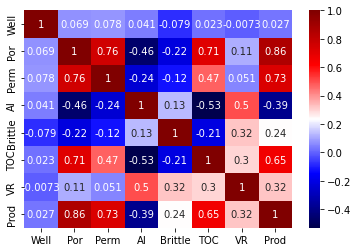

In [21]:
C = data.corr()
sns.heatmap(C, annot=True, cmap='seismic');
print('Rank:', np.linalg.matrix_rank(C))
print('Determinant: {:.4f}'.format(np.linalg.det(C)))

###  Задание 5.2
Создайте матрицу наблюдений. Обозначьте её за X, а вектор правильных ответов — за y.

1. Постройте модель линейной регрессии по методу наименьших квадратов. Для этого используйте матричную формулу NumPy. В качестве ответа укажите полученные оценки коэффициентов модели. Ответ округлите до целого числа.
2. Какой признак, согласно найденным целым коэффициентам, является неинформативным и не оказывает влияния на целевую переменную?

In [22]:
X = data.drop('Prod', axis=1)
y = data['Prod'].values
index = ['intercept']+list(X.columns)
n = X.shape[0]
X = np.column_stack((np.ones(n), X))
w_hat = np.linalg.inv(X.T@X)@X.T@y
print(pd.Series(np.round(w_hat, 0), index=index))

# Well

intercept   -1232.0
Well            0.0
Por           230.0
Perm          116.0
AI           -365.0
Brittle        25.0
TOC           -78.0
VR            785.0
dtype: float64


###  Задание 5.3
Далее потренируемся строить предсказание для наблюдений целевой переменной.

1. Постройте прогноз выработки газа для скважины с параметрами, указанными ниже. Чему равна абсолютная ошибка построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день). Ответ округлите до целого числа.
2. Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Чему равно значение метрики MAPE вашей модели? Ответ приведите в процентах (не указывайте знак процента), округлив его до первого знака после точки-разделителя.

In [23]:
x_new = np.array([1, 106, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42])
y_new = 4748.315024
y_new_pred = x_new @ w_hat
print(np.round(np.abs(y_new_pred - y_new), 0))

25.0


In [24]:
from sklearn.metrics import mean_absolute_percentage_error
y_pred = X @ w_hat
print('Result MAPE {:.1f}:'.format(mean_absolute_percentage_error(y, y_pred)*100))

Result MAPE 3.6:


### Задание 5.5
Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения, выше . Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с объёмом добычи газа.

Также исключите из данных факторы, для которых корреляция с целевой переменной меньше .

In [25]:
from sklearn.metrics import mean_absolute_percentage_error
X = data.drop(['Prod', 'Perm', 'TOC', 'Well'], axis=1)
y = data['Prod'].values
index = ['intercept']+list(X.columns)
n = X.shape[0]
X = np.column_stack((np.ones(n), X))
w_hat = np.linalg.inv(X.T@X)@X.T@y
y_pred = X @ w_hat
print(pd.Series(np.round(w_hat, 0), index=index))
print(f'MAPE: {mean_absolute_percentage_error(y, y_pred)*100:.1f} %')

intercept   -1835.0
Por           293.0
AI           -200.0
Brittle        28.0
VR            517.0
dtype: float64
MAPE: 4.0 %


### Полиномиальная регрессия
Максимальная степень при переменной  называется степенью полинома.

Самый простой пример полинома от одной переменной — парабола. Это полином второй степени.

Кстати, отметим важный факт: уравнение прямой также является частным случае полинома первой степени:

In [26]:
A = np.array([
    [1, 1, 1, 1],
    [1, 3, -2, 1],
    [1, 9, 4, 1]
]).T
y = np.array([4, 5, 2, 2])
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat) 
# [2.4        0.46666667 0.13333333]

[2.4        0.46666667 0.13333333]


In [27]:
A = np.array([
    [1, 1, 1, 1, 1, 1, 1],
    [1, 3, -2, 1, 5, 13, 1],
    [3, 4, 5, -2, 4, 11, 3],
    [1, 9, 4, 1, 25, 169, 1],
    [3, 12, -10, -2, 20, 143, 3],
    [9, 16, 25, 4, 16, 121, 9]
    
]).T
y = np.array([4, 5, 2, 2, 6, 8, -1])
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat)
## [-2.25799015  2.37672337 -0.1322068  -0.10208147 -0.26501791  0.29722471]

[-2.25799015  2.37672337 -0.1322068  -0.10208147 -0.26501791  0.29722471]


In [28]:
# Для начала составим обычную матрицу наблюдений , расположив векторы в столбцах. 
# Обратите внимание, что вектор из 1 мы не будем добавлять в матрицу 
# (за нас это сделает генератор полиномиальных признаков):

A = np.array([
    [1, 3, -2, 1, 5, 13, 1],
    [3, 4, 5, -2, 4, 11, 3],
    [4, 5, 2, 2, 6, 8, -1],
]).T
print(A)

[[ 1  3  4]
 [ 3  4  5]
 [-2  5  2]
 [ 1 -2  2]
 [ 5  4  6]
 [13 11  8]
 [ 1  3 -1]]


In [29]:
# Затем импортируем класс PolynomialFeatures из библиотеки sklearn. 
# Создадим объект этого класса, указав при инициализации степень полинома равной 2. 
# Также укажем, что нам нужна генерация столбца из 1 (параметр include_bias=True):

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)

In [30]:
# Осталось только вызвать метод fit_transform() от имени этого объекта и передать в него нашу матрицу наблюдений A. 
# Для удобства выведем результат в виде DataFrame:

A_poly = poly.fit_transform(A)
display(pd.DataFrame(A_poly))

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,3.0,4.0,1.0,3.0,4.0,9.0,12.0,16.0
1,1.0,3.0,4.0,5.0,9.0,12.0,15.0,16.0,20.0,25.0
2,1.0,-2.0,5.0,2.0,4.0,-10.0,-4.0,25.0,10.0,4.0
3,1.0,1.0,-2.0,2.0,1.0,-2.0,2.0,4.0,-4.0,4.0
4,1.0,5.0,4.0,6.0,25.0,20.0,30.0,16.0,24.0,36.0
5,1.0,13.0,11.0,8.0,169.0,143.0,104.0,121.0,88.0,64.0
6,1.0,1.0,3.0,-1.0,1.0,3.0,-1.0,9.0,-3.0,1.0


А теперь построим модель полиномиальной регрессии на реальных данных.

Возьмём все те же данные о стоимости жилья в районах Бостона. Будем использовать следующие четыре признака: LSTAT, CRIM, PTRATIO и RM. С их помощью мы построим полиномиальную регрессию от первой до пятой степени включительно, а затем сравним результаты по значению средней абсолютной процентной ошибки (MAPE).

In [31]:
# Чтобы не дублировать код, объявим функцию polynomial_regression(). Она будет принимать на вход матрицу наблюдений, 
# вектор ответов и степень полинома, а возвращать матрицу с полиномиальными признаками, 
# вектор предсказаний и коэффициенты регрессии, найденные по МНК:

def polynomial_regression(X, y, k):
    poly = PolynomialFeatures(degree=k, include_bias=True)
    X_poly = poly.fit_transform(X)
    w_hat = np.linalg.inv(X_poly.T@X_poly)@X_poly.T@y
    y_pred = X_poly @ w_hat
    return X_poly, y_pred, w_hat

In [32]:
# Выделяем интересующие нас признаки и строим полиномы:

A = boston_data[['LSTAT', 'PTRATIO', 'RM','CRIM']]
y = boston_data[['PRICE']]
 
A_poly, y_pred, w_hat = polynomial_regression(A, y, 1)
A_poly2, y_pred2, w_hat2 = polynomial_regression(A, y, 2)
A_poly3, y_pred3, w_hat3 = polynomial_regression(A, y, 3)
A_poly4, y_pred4, w_hat4 = polynomial_regression(A, y, 4)
A_poly5, y_pred5, w_hat5 = polynomial_regression(A, y, 5)

In [33]:
# Посмотрим на качество построенных регрессий, вычислив метрику:

from sklearn.metrics import mean_absolute_percentage_error
 
print('MAPE для полинома 1-й степени {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred)*100))
print('MAPE для полинома 2-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred2)*100))
print('MAPE для полинома 3-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred3)*100))
print('MAPE для полинома 4-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred4)*100))
print('MAPE для полинома 5-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred5)*100))
## MAPE для полинома 1-й степени 18.20%
## MAPE для полинома 2-й степени  13.41%
## MAPE для полинома 3-й степени  12.93%
## MAPE для полинома 4-й степени  10.74%
## MAPE для полинома 5-й степени  5328.16%

MAPE для полинома 1-й степени 18.20%
MAPE для полинома 2-й степени  13.41%
MAPE для полинома 3-й степени  12.93%
MAPE для полинома 4-й степени  10.74%
MAPE для полинома 5-й степени  213.20%


Полиномиальная регрессия первой степени (линейная регрессия) показывает наименьшее качество предсказания, так как зависимость между факторами и целевым признаком нелинейная. С повышением степени полинома процентная ошибка на обучающей выборке вроде бы падает, однако для полинома пятой степени она резко возрастает и начинает измеряться тысячами процентов. Это означает, что модель вообще не описывает зависимость в исходных данных — её прогноз не имеет никакого отношения к действительности.

In [34]:
# посмотрим на коэффициенты регрессии для полинома пятой степени. Смотреть на каждый из них неудобно, 
# их слишком много (126, если быть точными), но можно взглянуть на минимум, максимум и среднее:

display(pd.DataFrame(w_hat5).describe())

,PRICE
count,126.000000
mean,-3.103881
std,5807.624502
min,-46221.934633
25%,-0.698434
50%,0.000002
75%,1.877716
max,40902.697423


Видно, что в степенях минимального и максимального коэффициентов явно что-то не так — коэффициенты слишком огромные (исчисляются миллионами).

In [35]:
# Теперь давайте взглянем на корреляционную матрицу для факторов, на которых мы строим полином пятой степени. Корреляцию со столбцом из единиц считать бессмысленно, поэтому мы не будем его рассматривать. Для удобства расчёта матрицы корреляций обернём матрицу  в DataFrame и воспользуемся методом corr():

# считаем матрицу корреляций (без столбца из единиц)
C = pd.DataFrame(A_poly5[:, 1:]).corr()
# считаем ранг корреляционной матрицы
print('Ранг корреляционной матрицы:', np.linalg.matrix_rank(C))
# считаем количество факторов (не включая столбец из единиц)
print('Количество факторов:', A_poly5[:, 1:].shape[1])
# Ранг корреляционной матрицы: 110
# Количество факторов: 125

Ранг корреляционной матрицы: 110
Количество факторов: 125


Мы нашли корень проблемы: ранг корреляционной матрицы — 110, в то время как общее количество факторов (не считая единичного столбца) — 125, то есть ранг корреляционной матрицы не максимален. Это значит, что в корреляционной матрице присутствуют единичные корреляции, а в исходной матрице — линейно зависимые столбцы.

Как так вышло? На самом деле всё очень просто: в процессе перемножения каких-то из столбцов при создании полинома пятой степени получился такой полиномиальный фактор, который линейно выражается через другие факторы.

В результате при вычислении обратной матрицы  у нас получилось деление на число, близкое к 0, а элементы обратной матрицы получились просто огромными. Отсюда и появились явно неверные степени коэффициентов, которые дают далёкий от действительности прогноз, что приводит к отрицательной метрике.

In [36]:
# заметим, что, например, для полинома четвёртой степени ранг матрицы корреляций максимален, 
# то есть равен количеству факторов (не включая единичный столбец):

# считаем матрицу корреляций (без столбца из единиц)
C = pd.DataFrame(A_poly4[:, 1:]).corr()
# считаем ранг корреляционной матрицы
print('Ранг корреляционной матрицы:', np.linalg.matrix_rank(C))
# считаем количество факторов (не включая столбец из единиц)
print('Количество факторов:', A_poly4[:, 1:].shape[1])
## Ранг корреляционной матрицы: 69
## Количество факторов: 69

Ранг корреляционной матрицы: 69
Количество факторов: 69


In [37]:
# Поэтому и коэффициенты регрессии полинома четвёртой степени находятся в адекватных пределах.

display(pd.DataFrame(w_hat4).describe())

,PRICE
count,70.000000
mean,-50.890368
std,887.339389
min,-6925.309944
25%,-0.187932
50%,-0.000783
75%,0.322230
max,2305.255303


In [38]:
# посмотрим, что будет, если использовать для построения полиномиальной регрессии реализацию из библиотеки sklearn. 
# Создадим функцию polynomial_regression_sk — она будет делать то же самое, что и прошлая функция, но средствами sklearn. Дополнительно будем смотреть также стандартное отклонение (разброс) по коэффициентам регрессии.

def polynomial_regression_sk(X, y, k):
    poly = PolynomialFeatures(degree=k, include_bias=False)
    X_poly = poly.fit_transform(X)
    lr = LinearRegression().fit(X_poly, y)
    y_pred = lr.predict(X_poly)
    return X_poly, y_pred, lr.coef_

A = boston_data[["PTRATIO", "RM", "CRIM"]]
y = boston_data["PRICE"]

for k in range(1, 6):
    A_poly, y_pred, w_hat = polynomial_regression_sk(A, y, k)
    print(
        "MAPE для полинома степени {} — {:.2f}%, СКО — {:.0f}".format(
            k, mean_absolute_percentage_error(y, y_pred)*100, w_hat.std()
        )

    )
## MAPE для полинома степени 1 — 0.68, СКО — 2
## MAPE для полинома степени 2 — 0.81, СКО — 5
## MAPE для полинома степени 3 — 0.86, СКО — 9
## MAPE для полинома степени 4 — 0.91, СКО — 304
## MAPE для полинома степени 5 — 0.93, СКО — 17055



MAPE для полинома степени 1 — 21.08%, СКО — 4
MAPE для полинома степени 2 — 16.44%, СКО — 5
MAPE для полинома степени 3 — 15.63%, СКО — 65
MAPE для полинома степени 4 — 15.22%, СКО — 135
MAPE для полинома степени 5 — 14.71%, СКО — 2479



        Модель полиномиальной регрессии — более общий случай линейной регрессии, в котором зависимость целевой переменной от факторов нелинейная.
        Поиск коэффициентов полинома аналогичен линейной регрессии — решение неоднородной СЛАУ. 
        Возможна ситуация, когда какие-то сгенерированные полиномиальные факторы могут линейно выражаться через другие факторы. Тогда ранг корреляционной матрицы будет меньше числа факторов и поиск по классическому МНК-алгоритму не будет успешным.
        В sklearn для решения последней проблемы предусмотрена защита — использование сингулярного разложения матрицы . Однако данная защита не решает проблемы неустойчивости коэффициентов регрессии.
        Полиномиальная регрессия имеет сильную склонность к переобучению: чем выше степень полинома, тем сложнее модель и выше риск переобучения.


###  Задание 6.4
С помощью классического МНК найдите коэффициенты полиномиальной регрессии, если используется полином второй степени и задан фактор x и целевая переменная y.

In [39]:
A = np.array([
    [1, 1, 1, 1],
    [1, 3, -2, 9],
    [1, 9, 4, 81]
]).T
y = np.array([3, 7, -5, 21])
print(np.round(np.linalg.inv(A.T@A)@A.T@y, 1))
## [ 0.1  2.5 -0. ]

[ 0.1  2.5 -0. ]


### Регуляризация
Регуляризация — это способ уменьшения переобучения моделей машинного обучения путём намеренного увеличения смещения модели для уменьшения её разброса.

Цели регуляризации:
- предотвратить переобучение модели;
- включить в функцию потерь штраф за переобучение;
- обеспечить существование обратной матрицы;
- не допустить огромных коэффициентов модели.

Обучим модель полиномиальной регрессии третьей степени. Будем использовать данные о жилье в Бостоне и возьмём следующие четыре признака: LSTAT, CRIM, PTRATIO и RM.

In [40]:
# ля оценки качества модели будем использовать кросс-валидацию и сравнивать среднее значение метрики 
# на тренировочных и валидационных фолдах. Кросс-валидацию организуем с помощью функции cross_validate 
# из модуля model_selection:
from sklearn.model_selection import cross_validate

# В качестве метрики используем среднюю абсолютную процентную ошибку — MAPE.
# выделяем интересующие нас факторы
X = boston_data[['LSTAT', 'PTRATIO', 'RM','CRIM']]
y = boston_data[['PRICE']]
 
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)
 
# создаём модель линейной регрессии
lr = LinearRegression()
 
# оцениваем качество модели на кросс-валидации, метрика — MAPE
cv_results = cross_validate(lr, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))	
 
## MAPE на тренировочных фолдах: 12.64 %
## MAPE на валидационных фолдах: 24.16 %

MAPE на тренировочных фолдах: 12.64 %
MAPE на валидационных фолдах: 24.16 %


Что мы видим? Даже при, казалось бы, небольшой, третьей степени полинома мы получили переобучение: на тренировочной выборке \(MAPE=12.64 \%\), а вот на тестовой — \(MAPE=24.16 \%\). Показатели качества отличаются практически в два раза, что говорит о высоком разбросе модели. Ещё более удручающий результат мы получим, если воспользуемся полиномом большей степени (при желании вы можете проверить это самостоятельно).

### L2-регуляризация

In [41]:
# матрица наблюдений (включая столбец единиц)
A = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, -3, 2, 4],
    [2, 0, -6, 4, 8]
]).T
# вектор целевого признака
y = np.array([4, 3, -4, 2, 7])
# получаем оценку коэффициентов регрессии по МНК
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat) 
## LinAlgError: Singular matrix

LinAlgError: Singular matrix

Мы ожидаемо получили ошибку, говорящую о том, что матрица вырождена. 

In [42]:
# Попробуем регуляризацию Тихонова

# матрица наблюдений (включая столбец единиц)
A = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, -3, 2, 4],
    [2, 0, -6, 4, 8]
]).T
# вектор целевого признака
y = np.array([4, 3, -4, 2, 7])
# единичная матрица
E = np.eye(3)
# коэффициент регуляризации 
alpha = 5
# получаем оценку коэффициентов регрессии по МНК с регуляризацией Тихонова
w_hat_ridge = np.linalg.inv(A.T@A+alpha*E)@A.T@y
print(w_hat_ridge) 
## [0.6122449  0.29387755 0.5877551 ]

[0.6122449  0.29387755 0.5877551 ]


Работает! Мы получили вектор весов

Напомним, что за реализацию линейной регрессии в sklearn отвечает класс Ridge. Основной параметр модели, на который стоит обратить внимание — alpha, коэффициент регуляризации из формулы Тихонова.

In [43]:
# Давайте обучим модель для решения нашей последней задачи, а затем проверим коэффициенты регрессии. 
# Так как мы заранее заложили в матрицу столбец из единиц, то, чтобы получить корректное решение, 
# параметр fit_intercept следует установить в значение False.

from sklearn.linear_model import Ridge

# матрица наблюдений (включая столбец единиц)
A = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, -3, 2, 4],
    [2, 0, -6, 4, 8]
]).T
# вектор целевого признака
y = np.array([4, 3, -4, 2, 7])
# получаем оценку коэффициентов регрессии по МНК с регуляризацией Тихонова
ridge = Ridge(alpha=5, fit_intercept=False)
ridge.fit(A, y)
print(ridge.coef_) 
## [0.6122449  0.29387755 0.5877551 ]

[0.6122449  0.29387755 0.5877551 ]


Получили тот же самый результат, что и раньше.

Наконец, посмотрим, как регуляризация поможет побороть переобучение модели полиномиальной регрессии на наборе данных о домах в Бостоне. Используем те же самые признаки: LSTAT, CRIM, PTRATIO и RM. 

In [44]:
from sklearn.preprocessing import StandardScaler

# Воспользуемся моделью полиномиальной регрессии третьей степени с регуляризацией Тихонова 
# (коэффициент регуляризации возьмём равным 20) и проверим её качество на кросс-валидации по метрике MAPE.

# выделяем интересующие нас факторы
X = boston_data[['LSTAT', 'PTRATIO', 'RM','CRIM']]
y = boston_data[['PRICE']]
# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)
# создаём модель линейной регрессии c L2-регуляризацией
ridge = Ridge(alpha=20, solver='svd')
# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(ridge, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))
## MAPE на тренировочных фолдах: 12.54 %
## MAPE на валидационных фолдах: 17.02 %

MAPE на тренировочных фолдах: 12.54 %
MAPE на валидационных фолдах: 17.02 %


Нам удалось уменьшить ошибку (MAPE) на валидационных фолдах кросс-валидации с 24.16% до 17.02% и сократить разницу в метриках, тем самым уменьшив разброс ответов модели.

###  Задание 7.4
Вычислите коэффициенты линейной регрессии с -регуляризацией, используя аналитическую формулу Тихонова.
Коэффициент регуляизации = 1.

В качестве ответа приведите значения полученных коэффициентов линейной регрессии, округлив их до второго знака после точки-разделителя.

In [45]:
A = np.array([
    [1, 1, 1, 1, 1],
    [5, 9, 4, 3, 5],
    [15, 18, 18, 19, 19],
    [7, 6, 7, 7, 7]
]).T
y = np.array([24, 22, 35, 33, 36])
E = np.eye(4)
# коэффициент регуляризации
alpha = 1
# получаем оценку коэффициентов регрессии по МНК с регуляризацией Тихонова
w_hat_ridge = np.linalg.inv(A.T@A+alpha*E)@A.T@y
print(np.round(w_hat_ridge, 2))

[-0.09 -1.71  1.91  0.73]


### L1-регуляризация

L1-регуляризацией, Lasso (Least Absolute Shrinkage and Selection Operator), называется регуляризация, в которой порядок нормы = 1.

Таким образом, в случае L1-регуляризации мы ограничиваем сумму модулей весов модели. Такая величина называется нормой Манхэттена (расстоянием городских кварталов).

In [46]:
from sklearn.linear_model import Lasso
# матрица наблюдений (включая столбец единиц)
A = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, -3, 2, 4],
    [2, 0, -6, 4, 8]
]).T
# вектор целевого признака
y = np.array([4, 3, -4, 2, 7])
# получаем оценку коэффициентов регрессии с помощью L1-регуляризации
lasso = Lasso(alpha=0.1, fit_intercept=False)
lasso.fit(A, y)
print(lasso.coef_)
## [1.14925373 0.         0.71921642]

[1.14925373 0.         0.71921642]


А пока давайте применим -регуляризацию к нашей полиномиальной модели третьей степени, прогнозирующей типичную цену на дома в районах Бостона.

Так как метод координатного спуска, который применяется для поиска коэффициентов, является численным, то необходима стандартизация исходных данных, чтобы обеспечить ему сходимость. Возьмём в качестве коэффициента регуляризации и проверим качество полученной модели с помощью кросс-валидации по метрике MAPE:

In [47]:
# выделяем интересующие нас факторы
X = boston_data[['LSTAT', 'PTRATIO', 'RM','CRIM']]
y = boston_data[['PRICE']]

# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)

# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)

# создаём модель линейной регрессии c L1-регуляризацией
lasso = Lasso(alpha=0.1, max_iter=10000)

# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(lasso, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))
## MAPE на тренировочных фолдах: 12.44 %
## MAPE на валидационных фолдах: 16.44 %

MAPE на тренировочных фолдах: 12.44 %
MAPE на валидационных фолдах: 16.44 %


Видим, что с помощью -регуляризации удалось уменьшить ошибку модели (MAPE) на валидационных фолдах с 24.16% до 16.44% и сократить разницу в метриках на тренировочных и валидационных фолдах даже лучше, чем с этим справилась -регуляризация. Однако на самом деле мы просто удачно выбрали коэффициент регуляризации — при других значениях могли получиться совершенно другие результаты.

### ELASTIC-NET
Идея Elastic-Net состоит в том, что мы вводим ограничение как на норму весов порядка = 1, так и на норму порядка = 2

Аналитического решения у этой задачи нет, поэтому для её решения в sklearn, как и для модели Lasso, используется координатный спуск.

В sklearn эластичная сетка реализована в классе ElasticNet из пакета с линейными моделями — linear_model. За коэффициент отвечает параметр alpha, за коэффициент — l1_ratio.

In [48]:
from sklearn.linear_model import ElasticNet

# матрица наблюдений (включая столбец единиц)
A = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, -3, 2, 4],
    [2, 0, -6, 4, 8]
]).T
# вектор целевого признака
y = np.array([4, 3, -4, 2, 7])
# получаем оценку коэффициентов регрессии 
lasso = ElasticNet(alpha=0.1, l1_ratio=0.2, fit_intercept=False)
lasso.fit(A, y)
print(lasso.coef_)
## [1.13492457 0.19525842 0.6237965 ]

[1.13492457 0.19525842 0.6237965 ]


In [49]:
# получаем оценку коэффициентов регрессии
lasso = ElasticNet(alpha=0.1, l1_ratio=0.7, fit_intercept=False)
lasso.fit(A, y)
print(lasso.coef_)
## [1.14379753 0.         0.71993025]

[1.14379753 0.         0.71993025]


In [50]:
# получаем оценку коэффициентов регрессии
lasso = ElasticNet(alpha=0.1, l1_ratio=1, fit_intercept=False)
lasso.fit(A, y)
print(lasso.coef_)
## [1.14925373 0.         0.71921642]

[1.14925373 0.         0.71921642]


В округлениях значения не заметно, однако если присмотреться к коэффициентам более внимательно, можно увидеть, что мы получили в точности те же значения, которые получали для модели Lasso в примере № 2. Неудивительно, ведь мы обнулили влияние -регуляризации, выставив l1_ratio=1. По сути, мы использовали чистую модель Lasso.

Нам осталось только попробовать применить Elastic-Net к данным о недвижимости в Бостоне.

Как и для других моделей с регуляризацией, для Elastic-Net также лучше заранее позаботиться о стандартизации данных. В качестве коэффициентов регуляризации возьмём ,  . Качество модели проверим с помощью кросс-валидации на пяти фолдах, метрика — MAPE.

In [51]:
# выделяем интересующие нас факторы
X = boston_data[['LSTAT', 'PTRATIO', 'RM','CRIM']]
y = boston_data[['PRICE']]
# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)
# создаём модель линейной регрессии c L1- и L2-регуляризациями
lasso = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)
# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(lasso, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100)) 
## MAPE на тренировочных фолдах: 12.65 %
## MAPE на валидационных фолдах: 15.70 %

MAPE на тренировочных фолдах: 12.65 %
MAPE на валидационных фолдах: 15.70 %


Итак, Elastic-Net позволил нам уменьшить значение MAPE на валидационных фолдах с 24.16% до 15.7%. Отличный результат! Он получился лучше, чем у моделей Ridge и Lasso, но опять же скажем, что так бывает не всегда.

→ На практике при использовании моделей с регуляризацией стоит подбирать значения коэффициентов регуляризации с помощью методов подбора гиперпараметров, которые мы изучали в модуле «ML-7. Оптимизация гиперпараметров модели». Только после подбора гиперпараметров можно сделать вывод, какая из моделей показывает наилучшие результаты для решения конкретной задачи. Надеемся, вы помните, как подбираются гиперпараметры (если нет, освежите знания в модуле ML-7).

### Полиномиальная регрессия и регуляризация: практика
Продолжим решать задачу от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее, в юните 5, мы смогли построить модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. Далее мы будем использовать именно их (см. задание 5.5).

Мы хотим попробовать улучшить наш результат — метрику MAPE. Для этого воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку, поэтому для контроля качества модели мы будем использовать кросс-валидацию.

###  Задание 8.1
Сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов PolynomialFeatures из библиотеки sklearn. Параметр include_bias установите в значение False.
1. Сколько факторов у вас получилось после генерации полиномиальных признаков?
2. Обучите модель линейной регрессии из библиотеки sklearn (LinearRegression) на полученных полиномиальных факторах. Оцените среднее значение метрики MAPE, используя кросс-валидацию на пяти фолдах. Чему равны средние значения метрики MAPE на тренировочных и валидационных фолдах? Ответ приведите в процентах (не указывайте знак процента), округлив его до первого знака после точки-разделителя.

In [52]:
X = data.drop(['Prod', 'Perm', 'TOC', 'Well'], axis=1)
y = data['Prod'].values

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)
print('Количество факторов: {}'.format(X_poly.shape[1]))

lr = LinearRegression()
lr.fit(X_poly, y)

cv_results = cross_validate(lr, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.1f}'.format(-cv_results['train_score'].mean() * 100))
print('MAPE на валидационных фолдах: {:.1f}'.format(-cv_results['test_score'].mean() * 100))

Количество факторов: 34
MAPE на тренировочных фолдах: 1.8
MAPE на валидационных фолдах: 2.7


###  Задание 8.2
Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём L1-регуляризацию.

Обучите модель Lasso из библиотеки sklearn на полученных полиномиальных факторах, предварительно стандартизировав факторы с помощью StandardScaler. Коэффициент регуляризации выставите равным 5.

Оцените среднее значение метрики MAPE, используя кросс-валидацию на пяти фолдах.

Чему равны средние значения метрики MAPE на тренировочных и валидационных фолдах? 

In [53]:
X = data.drop(['Prod', 'Perm', 'TOC', 'Well'], axis=1)
y = data['Prod'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

lasso = Lasso(alpha=5)
lasso.fit(X_poly, y)

# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(lasso, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.1f}'.format(-cv_results['train_score'].mean() * 100))
print('MAPE на валидационных фолдах: {:.1f}'.format(-cv_results['test_score'].mean() * 100))

MAPE на тренировочных фолдах: 1.8
MAPE на валидационных фолдах: 2.3


###  Задание 8.3
Проделаем то же самое с L2-регуляризацией.

Обучите модель Ridge из библиотеки sklearn на полученных полиномиальных факторах, предварительно стандартизировав факторы с помощью StandardScaler. Коэффициент регуляризации выставите равным 1.

Оцените среднее значение метрики MAPE, используя кросс-валидацию на пяти фолдах.

Чему равны средние значения метрики MAPE на тренировочных и валидационных фолдах? 

In [54]:
X = data.drop(['Prod', 'Perm', 'TOC', 'Well'], axis=1)
y = data['Prod'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

ridge = Ridge(alpha=1)
ridge.fit(X_poly, y)

# оцениваем качество модели на кросс-валидации

cv_results = cross_validate(ridge, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.1f}'.format(-cv_results['train_score'].mean() * 100))
print('MAPE на валидационных фолдах: {:.1f}'.format(-cv_results['test_score'].mean() * 100))

MAPE на тренировочных фолдах: 1.8
MAPE на валидационных фолдах: 2.7
